In [1]:
import os
import re

# Image processing...
from PIL import Image

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import cv2
import pickle
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Activation,Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adadelta
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# Setting up the image pool
path = 'C:/Users/Sudo_kill/Desktop/kuba/images/images/'
imgs = os.listdir(path)
img_x = img_y = 50 # image size is constant
n_samples = np.size(imgs)
n_samples # 20778 originally

20778

In [4]:
l = 'Toyota0512_small.jpg'

re.findall(r'(\w+?)(\d+)', l)[0][0]

'Toyota'

In [5]:
d ='Volvo3215_small.jpg'

re.findall(r'(\w+?)(\d+)', d)[0][0]

'Volvo'

In [6]:
for img in os.listdir(path):
    print(img)
    break

Alfa Romeo10882_small.jpg


In [7]:
brand_name=[]
for img in os.listdir(path):
    logo = re.findall(r'(\w+?)(\d+)',img)[0][0]
    print(logo)
    break

Romeo


In [8]:
for img in os.listdir(path):
    i = np.array(np.array(Image.open(path+img).convert("RGB")).flatten(),order='F',dtype='uint8')
    print(i.shape)
    print(i)
    break

(7500,)
[1 0 2 ... 0 0 0]


In [9]:
brand_images=[]
brand_names=[]

for img in os.listdir(path):
    logo = re.findall(r'(\w+?)(\d+)',img)[0][0]
    i = np.array(np.array(Image.open(path+img).convert("RGB")).flatten(),order='F',dtype='uint8')
    brand_names.append(logo)
    brand_images.append(i)


In [10]:
print(len(brand_names))
print(len(brand_images))

20778
20778


In [11]:
All_brands= []
All_brands= np.unique(np.array(brand_names))
print("Total no.of brands :",len(All_brands))

All_brands


Total no.of brands : 39


array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
       'Kia', 'Lada', 'Lancia', 'Lexus', 'Maserati', 'Mazda', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault',
       'Romeo', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype='<U10')

In [12]:
x = np.array(brand_images)
y = np.array(brand_names)

In [13]:
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



In [14]:
x = x/255.0
x[1]

array([0.91372549, 1.        , 1.        , ..., 1.        , 1.        ,
       1.        ])

In [15]:
data,labels = shuffle(x,y,random_state=42) 
train_data = [data,labels]

(20778, 7500) (20778,)


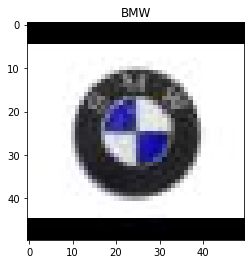

In [16]:
i = 190
print(train_data[0].shape, train_data[1].shape)
plt.imshow(data[i].reshape(50,50,3))
plt.title(labels[i])
plt.show()

In [17]:
otr = OneHotEncoder()
y = otr.fit_transform(train_data[1].reshape(-1,1)).toarray()

In [18]:
y.shape

(20778, 39)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train_data[0],y, test_size=0.2)

In [20]:
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 3)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 3)

In [21]:
X_train.shape

(16622, 50, 50, 3)

In [22]:
y_train.shape

(16622, 39)

In [23]:
X_test.shape

(4156, 50, 50, 3)

In [24]:
y_test.shape

(4156, 39)

In [26]:
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             horizontal_flip=True,
                             vertical_flip=0.3,
                             zoom_range=0.3)

datagen.fit(X_train)

In [28]:
batch_size = 128
n_classes = len(All_brands)
epochs = 200
n_channels =3

In [29]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(img_x,img_y,n_channels),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),
                 padding='same',                 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),
                 padding='same',                 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),
                 padding='same',               
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# final activation is softmax, tuned to the number of classes/labels possible
model.add(Dense(len(All_brands), activation='softmax'))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [30]:
opt = Adam()

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])

In [31]:
model.fit(datagen.flow(X_train,y_train,batch_size=batch_size,shuffle=True,seed=100),
                    steps_per_epoch=X_train.shape[0]//batch_size,
                    epochs=epochs, validation_data=(X_test,y_test),
                    workers=4)

Epoch 1/200
129/129 [==============================] - 35s 266ms/step - loss: 3.6307 - categorical_accuracy: 0.0395 - val_loss: 3.5753 - val_categorical_accuracy: 0.0438
Epoch 2/200
129/129 [==============================] - 38s 297ms/step - loss: 3.5728 - categorical_accuracy: 0.0542 - val_loss: 3.5144 - val_categorical_accuracy: 0.0481
Epoch 3/200
129/129 [==============================] - 40s 306ms/step - loss: 3.5330 - categorical_accuracy: 0.0598 - val_loss: 3.4835 - val_categorical_accuracy: 0.0808
Epoch 4/200
129/129 [==============================] - 39s 304ms/step - loss: 3.4679 - categorical_accuracy: 0.0783 - val_loss: 3.3534 - val_categorical_accuracy: 0.1011
Epoch 5/200
129/129 [==============================] - 40s 306ms/step - loss: 3.4050 - categorical_accuracy: 0.0899 - val_loss: 3.2426 - val_categorical_accuracy: 0.1270
Epoch 6/200
129/129 [==============================] - 41s 314ms/step - loss: 3.3182 - categorical_accuracy: 0.1096 - val_loss: 3.1655 - val_categoric

Epoch 49/200
129/129 [==============================] - 39s 297ms/step - loss: 2.1511 - categorical_accuracy: 0.4199 - val_loss: 1.9104 - val_categorical_accuracy: 0.5029
Epoch 50/200
129/129 [==============================] - 38s 296ms/step - loss: 2.1287 - categorical_accuracy: 0.4274 - val_loss: 1.8969 - val_categorical_accuracy: 0.4978
Epoch 51/200
129/129 [==============================] - 38s 294ms/step - loss: 2.1247 - categorical_accuracy: 0.4323 - val_loss: 1.8883 - val_categorical_accuracy: 0.5007
Epoch 52/200
129/129 [==============================] - 38s 297ms/step - loss: 2.0980 - categorical_accuracy: 0.4366 - val_loss: 1.8777 - val_categorical_accuracy: 0.4998
Epoch 53/200
129/129 [==============================] - 38s 296ms/step - loss: 2.1168 - categorical_accuracy: 0.4366 - val_loss: 1.8806 - val_categorical_accuracy: 0.4981
Epoch 54/200
129/129 [==============================] - 38s 292ms/step - loss: 2.0999 - categorical_accuracy: 0.4376 - val_loss: 1.8574 - val_cat

Epoch 97/200
129/129 [==============================] - 39s 298ms/step - loss: 1.7081 - categorical_accuracy: 0.5497 - val_loss: 1.5507 - val_categorical_accuracy: 0.5965
Epoch 98/200
129/129 [==============================] - 39s 297ms/step - loss: 1.7185 - categorical_accuracy: 0.5495 - val_loss: 1.4900 - val_categorical_accuracy: 0.6189
Epoch 99/200
129/129 [==============================] - 39s 302ms/step - loss: 1.7376 - categorical_accuracy: 0.5444 - val_loss: 1.4650 - val_categorical_accuracy: 0.6213
Epoch 100/200
129/129 [==============================] - 39s 300ms/step - loss: 1.7180 - categorical_accuracy: 0.5463 - val_loss: 1.5012 - val_categorical_accuracy: 0.6193
Epoch 101/200
129/129 [==============================] - 38s 296ms/step - loss: 1.7188 - categorical_accuracy: 0.5492 - val_loss: 1.4724 - val_categorical_accuracy: 0.6270
Epoch 102/200
129/129 [==============================] - 39s 300ms/step - loss: 1.7232 - categorical_accuracy: 0.5467 - val_loss: 1.4926 - val_

Epoch 145/200
129/129 [==============================] - 39s 297ms/step - loss: 1.5433 - categorical_accuracy: 0.5964 - val_loss: 1.3588 - val_categorical_accuracy: 0.6516
Epoch 146/200
129/129 [==============================] - 39s 299ms/step - loss: 1.5194 - categorical_accuracy: 0.6029 - val_loss: 1.3255 - val_categorical_accuracy: 0.6622
Epoch 147/200
129/129 [==============================] - 38s 296ms/step - loss: 1.5274 - categorical_accuracy: 0.6049 - val_loss: 1.2579 - val_categorical_accuracy: 0.6785
Epoch 148/200
129/129 [==============================] - 38s 294ms/step - loss: 1.5153 - categorical_accuracy: 0.6014 - val_loss: 1.2565 - val_categorical_accuracy: 0.6901
Epoch 149/200
129/129 [==============================] - 38s 295ms/step - loss: 1.5237 - categorical_accuracy: 0.6016 - val_loss: 1.2614 - val_categorical_accuracy: 0.6831
Epoch 150/200
129/129 [==============================] - 38s 295ms/step - loss: 1.5098 - categorical_accuracy: 0.6040 - val_loss: 1.2936 - v

129/129 [==============================] - 39s 300ms/step - loss: 1.4088 - categorical_accuracy: 0.6372 - val_loss: 1.1782 - val_categorical_accuracy: 0.7031
Epoch 193/200
129/129 [==============================] - 39s 297ms/step - loss: 1.3907 - categorical_accuracy: 0.6388 - val_loss: 1.2629 - val_categorical_accuracy: 0.6831
Epoch 194/200
129/129 [==============================] - 38s 293ms/step - loss: 1.4116 - categorical_accuracy: 0.6314 - val_loss: 1.2377 - val_categorical_accuracy: 0.6906
Epoch 195/200
129/129 [==============================] - 39s 299ms/step - loss: 1.4131 - categorical_accuracy: 0.6393 - val_loss: 1.1968 - val_categorical_accuracy: 0.7012
Epoch 196/200
129/129 [==============================] - 39s 300ms/step - loss: 1.4162 - categorical_accuracy: 0.6327 - val_loss: 1.2286 - val_categorical_accuracy: 0.6920
Epoch 197/200
129/129 [==============================] - 39s 297ms/step - loss: 1.3952 - categorical_accuracy: 0.6400 - val_loss: 1.1861 - val_categorical

In [32]:
scores = model.evaluate(X_test, y_test) 
print("Accuracy test: %.2f%%" % (scores[1]*100))

130/130 [==============================] - 2s 17ms/step - loss: 1.1944 - categorical_accuracy: 0.7004
Accuracy test: 70.04%


In [46]:
image = np.expand_dims(X_test[500], axis=0)
z = model.predict(image)
z

array([[1.2448151e-05, 4.3114701e-06, 1.4512588e-05, 6.8479909e-07,
        5.1080528e-06, 3.3329314e-05, 8.4687611e-11, 4.4611265e-10,
        2.0814743e-09, 2.1425356e-07, 3.7672216e-06, 5.9590454e-04,
        3.7724828e-07, 3.5117462e-09, 2.4068703e-08, 1.1026046e-06,
        8.9171488e-07, 8.4489468e-04, 1.4109415e-06, 8.0446041e-01,
        1.7722973e-01, 7.3583045e-08, 7.8339353e-06, 1.5810097e-02,
        1.3168176e-08, 3.3171721e-12, 3.5081027e-06, 8.6395535e-10,
        4.6355577e-09, 9.7496466e-10, 1.0913506e-09, 5.7070952e-07,
        3.4297575e-06, 2.7291185e-06, 8.4969279e-04, 6.4033664e-08,
        7.2840412e-05, 4.1453468e-08, 3.9956365e-05]], dtype=float32)

In [47]:
h = z.max()
h

0.8044604

In [48]:
result = np.where(z == h)
result
result[1]
y = result[1]
y[0]
B = y[0]
All_brands[B]

'Mazda'

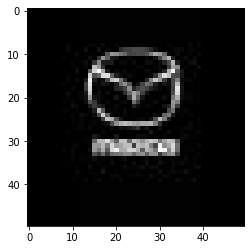

In [49]:
plt.imshow(X_test[500])
plt.show()

In [59]:
from sklearn.metrics import precision_recall_fscore_support as prfs
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
precision, recall, f1, support = prfs(y_test, y_pred, average='weighted')
print("Precision: {:.2%}\nRecall: {:.2%}\nF1 score: {:.2%}\nAccuracy: {:.2%}".format(precision, recall, f1, scores[1]))

Precision: 89.62%
Recall: 61.62%
F1 score: 72.22%
Accuracy: 70.04%


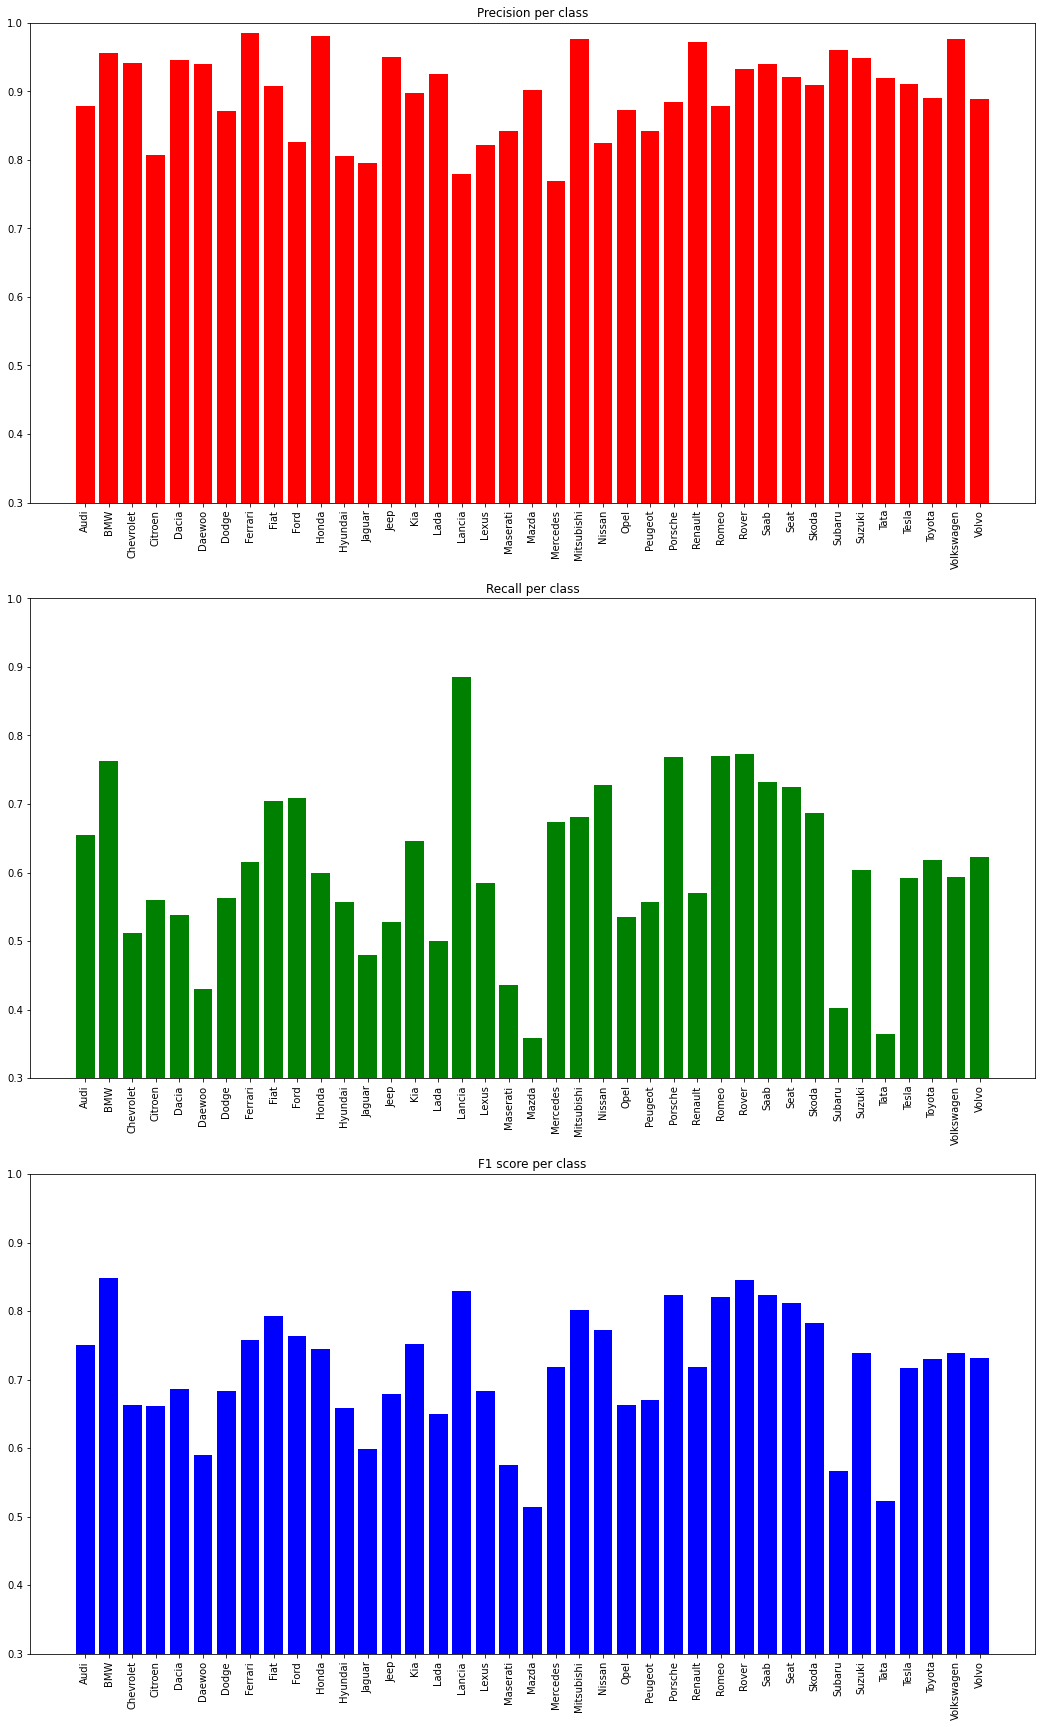

In [76]:
precision, recall, f1, support= prfs(y_test, y_pred, average=None)

plt.subplots(figsize=(18,30))
x = range(len(All_brands))
plt.subplot(311)
plt.title('Precision per class')
plt.ylim(0.3, 1.00)
plt.bar(x, precision_, color='Red')
plt.xticks(x,All_brands, rotation = 90)
plt.subplot(312)
plt.title('Recall per class')
plt.ylim(0.3, 1.00)
plt.bar(x, recall_, color='Green')
plt.xticks(x,All_brands, rotation = 90)
plt.subplot(313)
plt.title('F1 score per class')
plt.ylim(0.3, 1.00)
plt.bar(x, f1_, color='Blue')
plt.xticks(x,All_brands, rotation = 90)
plt.show()